In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
path = "../data/number/"
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
df_number = pd.DataFrame(columns=['label', 'x', 'y', 'time_taken', 'speed', 'strokes'])
for file in onlyfiles:
    with open(path+file) as f:
        content = f.readlines()
        label = int(content[0])


    strokes = int(content[len(content)-1][11:12]) #How many strokes of the pen
    n_row = 3
    x = []
    y = []
    time_taken = []
    for _ in range(strokes):
        if n_row < len(content)-3:
            if(content[n_row] == "Pen Down (x,y)\n"):
                n_row += 1
                
            while content[n_row] != 'Pen Up\n' and content[n_row] != '\n': #Take all of the axis
                xi, yi = content[n_row].split('_')
                yi = yi[:-1]
                n_row += 1
                x.append(float(xi))
                y.append(float(yi))
                if n_row >= len(content)-3 :
                    break
            n_row += 1
            
            if content[n_row][0] == "T": #If there is written "Time_taken"
                time_taken.append(content[n_row][11:16])
                n_row += 1
                
            if content[n_row][0] == "T": #There are double "Time_taken"
                n_row += 1
                
    speed = content[len(content)-2][7:12]
    df_temp = pd.DataFrame([[label,x,y,time_taken, speed, strokes]], columns=['label', 'x', 'y', 'time_taken', 'speed', 'strokes'])
    df_number = pd.concat([df_number, df_temp])
    
df_number = df_number.drop(columns="time_taken")
            # Drop column time_taken beacuse is not good. It can be fixed
            # But it's not so important because we have also the ratio speed that is strokes/seconds


In [3]:
# df_number.to_csv("data/number/number.csv", index=False)

In [4]:
# df_number = pd.read_csv("data/number.csv")

# train_size = int(0.7*len(df_number))
df_number_train = df_number
# df_number_test = df_number[train_size:]

In [5]:
df_number_train[df_number_train['x'].map(lambda d: len(d)) > 0]

for i in range(len(df_number_train)):
    if df_number_train.iloc[i,1] == []:
        df_number_train.iloc[i,1] = np.nan

df_number_train.dropna(subset=['x'], inplace=True)
df_number_train

,label,x,y,speed,strokes
0,3,"[699.0, 733.0, 768.0, 799.0, 823.0, 840.0, 850...","[172.0, 170.0, 171.0, 175.0, 180.0, 187.0, 194...",1.684,1
0,5,"[645.0, 700.0, 763.0, 827.0, 911.0, 932.0, 980...","[58.0, 53.0, 49.0, 47.0, 50.0, 52.0, 58.0, 60....",3.199,2
0,7,"[557.0, 586.0, 617.0, 648.0, 682.0, 715.0, 748...","[146.0, 145.0, 143.0, 141.0, 140.0, 138.0, 136...",1.279,1
0,8,"[497.0, 506.0, 518.0, 538.0, 582.0, 613.0, 643...","[279.0, 265.0, 254.0, 243.0, 228.0, 221.0, 218...",1.279,1
0,6,"[751.0, 741.0, 731.0, 724.0, 715.0, 699.0, 686...","[95.0, 102.0, 110.0, 116.0, 123.0, 137.0, 149....",0.946,1
...,...,...,...,...,...
0,2,"[376.0, 374.0, 379.0, 386.0, 397.0, 411.0, 442...","[274.0, 264.0, 256.0, 249.0, 241.0, 233.0, 223...",Infin,1
0,8,"[864.0, 846.0, 825.0, 792.0, 752.0, 709.0, 647...","[186.0, 170.0, 161.0, 152.0, 145.0, 140.0, 136...",1.573,1
0,4,"[751.0, 733.0, 720.0, 713.0, 697.0, 678.0, 657...","[142.0, 159.0, 172.0, 179.0, 193.0, 209.0, 229...",1.400,2
0,6,"[664.0, 633.0, 622.0, 578.0, 560.0, 504.0, 467...","[215.0, 204.0, 204.0, 210.0, 214.0, 238.0, 263...",1.560,1


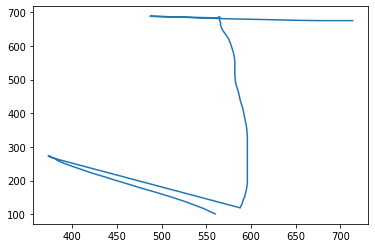

In [6]:
n = 45
# plt.plot(df_number['x'].iloc[0], df_number['y'].iloc[0])
plt.plot(df_number_train['x'].iloc[n], df_number_train['y'].iloc[n])
#plt.plot(df_number['x'].iloc[2], df_number['y'].iloc[2])
# plt.plot(df_number['x'].iloc[3], df_number['y'].iloc[3])

#Sono al contrario

In [7]:
df_number_train.iloc[n]

label                                                      1
x          [560.0, 554.0, 547.0, 537.0, 526.0, 511.0, 495...
y          [101.0, 108.0, 117.0, 127.0, 138.0, 151.0, 164...
speed                                                  2.258
strokes                                                    3
Name: 0, dtype: object

In [8]:
# Take only a subset of the dataframe
# df_number_train = df_number_train[:10]  #THEN REMOVE

# RIMUOVO QUELLI CON PIÙ DI UN STROKE PERCHÉ MI ROMPONO IL CAZZO (poi aggiustare)
#df_number_train = df_number_train[df_number_train['strokes'] == 1]

# Rimuovo tutte quelle con < 11 (x,y)
df_number_train = df_number_train[df_number_train['x'].map(lambda d: len(d)) > 15]

index = pd.Series(np.arange(len(df_number_train)))
df_number_train.set_index(index, inplace=True)

In [9]:
# Calculate angle between two points in a strange mathod (BUT correct)

def calculate_arctan2_of_two_points(x1, y1, x2, y2):
    angle = np.arctan2(y2-y1, x2-x1)
    return angle

# angles = pd.Series(index=df_number_train.index)
angles = []
i = 0

for i in range(len(df_number_train)):
    number = df_number_train.iloc[i]
    vector_of_angles = []
    for p in range(len(number['x'])-1):
        angle = calculate_arctan2_of_two_points(number['x'][p], number['y'][p], number['x'][p+1], number['y'][p+1])
        angle = round(angle, 2)
        vector_of_angles.append(angle)
    # angles[i] = vector_of_angles
    angles.append(vector_of_angles)


df_number_train['arctan2_2'] = angles
df_number_train.head()

/var/folders/y3/cbbh6yn577527f2swpfwv0qr0000gn/T/ipykernel_85914/2100225661.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number_train['arctan2_2'] = angles


,label,x,y,speed,strokes,arctan2_2
0,3,"[699.0, 733.0, 768.0, 799.0, 823.0, 840.0, 850...","[172.0, 170.0, 171.0, 175.0, 180.0, 187.0, 194...",1.684,1,"[-0.06, 0.03, 0.13, 0.21, 0.39, 0.61, 1.46, 2...."
1,5,"[645.0, 700.0, 763.0, 827.0, 911.0, 932.0, 980...","[58.0, 53.0, 49.0, 47.0, 50.0, 52.0, 58.0, 60....",3.199,2,"[-0.09, -0.06, -0.03, 0.04, 0.09, 0.12, 0.18, ..."
2,7,"[557.0, 586.0, 617.0, 648.0, 682.0, 715.0, 748...","[146.0, 145.0, 143.0, 141.0, 140.0, 138.0, 136...",1.279,1,"[-0.03, -0.06, -0.06, -0.03, -0.06, -0.06, -0...."
3,8,"[497.0, 506.0, 518.0, 538.0, 582.0, 613.0, 643...","[279.0, 265.0, 254.0, 243.0, 228.0, 221.0, 218...",1.279,1,"[-1.0, -0.74, -0.5, -0.33, -0.22, -0.1, 0.0, 0..."
4,6,"[751.0, 741.0, 731.0, 724.0, 715.0, 699.0, 686...","[95.0, 102.0, 110.0, 116.0, 123.0, 137.0, 149....",0.946,1,"[2.53, 2.47, 2.43, 2.48, 2.42, 2.4, 2.38, 2.29..."


In [11]:
def calculate_arctan2(x1, y1):
    angle = np.arctan2(y1, x1)
    return angle

# angles = pd.Series(index=df_number_train.index)
angles = []
i = 0

for i in range(len(df_number_train)):
    number = df_number_train.iloc[i]
    vector_of_angles = []
    for p in range(len(number['x'])):
        angle = calculate_arctan2(number['x'][p], number['y'][p])
        angle = round(angle, 2)
        vector_of_angles.append(angle)
    angles.append(vector_of_angles)


df_number_train['arctan_1'] = angles
df_number_train.head()

/var/folders/y3/cbbh6yn577527f2swpfwv0qr0000gn/T/ipykernel_85914/1718250237.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number_train['arctan_1'] = angles


,label,x,y,speed,strokes,arctan2_2,arctan_1
0,3,"[699.0, 733.0, 768.0, 799.0, 823.0, 840.0, 850...","[172.0, 170.0, 171.0, 175.0, 180.0, 187.0, 194...",1.684,1,"[-0.06, 0.03, 0.13, 0.21, 0.39, 0.61, 1.46, 2....","[0.24, 0.23, 0.22, 0.22, 0.22, 0.22, 0.22, 0.2..."
1,5,"[645.0, 700.0, 763.0, 827.0, 911.0, 932.0, 980...","[58.0, 53.0, 49.0, 47.0, 50.0, 52.0, 58.0, 60....",3.199,2,"[-0.09, -0.06, -0.03, 0.04, 0.09, 0.12, 0.18, ...","[0.09, 0.08, 0.06, 0.06, 0.05, 0.06, 0.06, 0.0..."
2,7,"[557.0, 586.0, 617.0, 648.0, 682.0, 715.0, 748...","[146.0, 145.0, 143.0, 141.0, 140.0, 138.0, 136...",1.279,1,"[-0.03, -0.06, -0.06, -0.03, -0.06, -0.06, -0....","[0.26, 0.24, 0.23, 0.21, 0.2, 0.19, 0.18, 0.17..."
3,8,"[497.0, 506.0, 518.0, 538.0, 582.0, 613.0, 643...","[279.0, 265.0, 254.0, 243.0, 228.0, 221.0, 218...",1.279,1,"[-1.0, -0.74, -0.5, -0.33, -0.22, -0.1, 0.0, 0...","[0.51, 0.48, 0.46, 0.42, 0.37, 0.35, 0.33, 0.3..."
4,6,"[751.0, 741.0, 731.0, 724.0, 715.0, 699.0, 686...","[95.0, 102.0, 110.0, 116.0, 123.0, 137.0, 149....",0.946,1,"[2.53, 2.47, 2.43, 2.48, 2.42, 2.4, 2.38, 2.29...","[0.13, 0.14, 0.15, 0.16, 0.17, 0.19, 0.21, 0.2..."


In [12]:
# df_number_train
# B è la distanza da quello prima
# C è la distanza da quello dopo
# A è la tangente del punto

angles = []
i = 0

for i in range(len(df_number_train)):
    number = df_number_train.iloc[i]
    vector_of_angles = []
    for p in range(4,len(number['x'])-4):
        B = np.sqrt((number['x'][p] - number['x'][p+4])**2 + (number['y'][p] - number['y'][p+4])**2)
        C = np.sqrt((number['x'][p] - number['x'][p-4])**2 + (number['y'][p] - number['y'][p-4])**2)
        A = np.sqrt((number['x'][p+4] - number['x'][p-4])**2 + (number['y'][p+4] - number['y'][p-4])**2)
        angle = np.arccos(round((B**2 + C**2 - A**2)/(2*B*C), 5))          
        angle = round(angle, 4)
        if np.isnan(angle): #To fix
            angle = 0
        vector_of_angles.append(angle)
            
    # angles[i] = vector_of_angles
    angles.append(vector_of_angles)

df_number_train['curvature_4'] = angles
# df_number_train['angles_tangent'].iloc[10] #- df_number_train['angles'].iloc[10]
# list(set(df_number_train['angles_tangent'].iloc[10]) - set(df_number_train['angles'].iloc[10]))
# df_number_train

/var/folders/y3/cbbh6yn577527f2swpfwv0qr0000gn/T/ipykernel_85914/1086880219.py:16: RuntimeWarning: invalid value encountered in double_scalars
  angle = np.arccos(round((B**2 + C**2 - A**2)/(2*B*C), 5))
/var/folders/y3/cbbh6yn577527f2swpfwv0qr0000gn/T/ipykernel_85914/1086880219.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number_train['curvature_4'] = angles


In [13]:
angles = []
i = 0

for i in range(len(df_number_train)):
    number = df_number_train.iloc[i]
    vector_of_angles = []
    for p in range(2,len(number['x'])-2):
        B = np.sqrt((number['x'][p] - number['x'][p+2])**2 + (number['y'][p] - number['y'][p+2])**2)
        C = np.sqrt((number['x'][p] - number['x'][p-2])**2 + (number['y'][p] - number['y'][p-2])**2)
        A = np.sqrt((number['x'][p+2] - number['x'][p-2])**2 + (number['y'][p+2] - number['y'][p-2])**2)
        angle = np.arccos(round((B**2 + C**2 - A**2)/(2*B*C), 5))          
        angle = round(angle, 4)
        if np.isnan(angle): #To fix
            angle = 0
        vector_of_angles.append(angle)
            
    # angles[i] = vector_of_angles
    angles.append(vector_of_angles)

df_number_train['curvature_2'] = angles

/var/folders/y3/cbbh6yn577527f2swpfwv0qr0000gn/T/ipykernel_85914/938614773.py:11: RuntimeWarning: invalid value encountered in double_scalars
  angle = np.arccos(round((B**2 + C**2 - A**2)/(2*B*C), 5))
/var/folders/y3/cbbh6yn577527f2swpfwv0qr0000gn/T/ipykernel_85914/938614773.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number_train['curvature_2'] = angles


In [14]:
angles = []
i = 0

for i in range(len(df_number_train)):
    number = df_number_train.iloc[i]
    vector_of_angles = []
    for p in range(1,len(number['x'])-1):
        B = np.sqrt((number['x'][p] - number['x'][p+1])**2 + (number['y'][p] - number['y'][p+1])**2)
        C = np.sqrt((number['x'][p] - number['x'][p-1])**2 + (number['y'][p] - number['y'][p-1])**2)
        A = np.sqrt((number['x'][p+1] - number['x'][p-1])**2 + (number['y'][p+1] - number['y'][p-1])**2)
        angle = np.arccos(round((B**2 + C**2 - A**2)/(2*B*C), 5))          
        angle = round(angle, 4)
        if np.isnan(angle): #To fix
            angle = 0
        vector_of_angles.append(angle)
            
    # angles[i] = vector_of_angles
    angles.append(vector_of_angles)

df_number_train['curvature_1'] = angles

/var/folders/y3/cbbh6yn577527f2swpfwv0qr0000gn/T/ipykernel_85914/3421169458.py:11: RuntimeWarning: invalid value encountered in double_scalars
  angle = np.arccos(round((B**2 + C**2 - A**2)/(2*B*C), 5))
/var/folders/y3/cbbh6yn577527f2swpfwv0qr0000gn/T/ipykernel_85914/3421169458.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number_train['curvature_1'] = angles


In [16]:

# angles = pd.Series(index=df_number_train.index)
angles = []
i = 0

for i in range(len(df_number_train)):
    number = df_number_train.iloc[i]
    vector_of_angles = []
    for p in range(len(number['x'])-1):
        angle = (number['x'][p]+number['x'][p+1])/2

        vector_of_angles.append(angle)
    # angles[i] = vector_of_angles
    angles.append(vector_of_angles)


df_number_train['x_smooth'] = angles
df_number_train.head()

/var/folders/y3/cbbh6yn577527f2swpfwv0qr0000gn/T/ipykernel_85914/190650008.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number_train['x_smooth'] = angles


,label,x,y,speed,strokes,arctan2_2,arctan_1,curvature_4,curvature_2,curvature_1,x_smooth
0,3,"[699.0, 733.0, 768.0, 799.0, 823.0, 840.0, 850...","[172.0, 170.0, 171.0, 175.0, 180.0, 187.0, 194...",1.684,1,"[-0.06, 0.03, 0.13, 0.21, 0.39, 0.61, 1.46, 2....","[0.24, 0.23, 0.22, 0.22, 0.22, 0.22, 0.22, 0.2...","[2.1756, 1.3927, 1.0407, 1.0772, 1.5118, 2.339...","[2.9649, 2.9325, 2.8254, 2.4578, 1.7708, 1.772...","[3.0543, 3.0419, 3.0645, 2.9564, 2.9215, 2.292...","[716.0, 750.5, 783.5, 811.0, 831.5, 845.0, 850..."
1,5,"[645.0, 700.0, 763.0, 827.0, 911.0, 932.0, 980...","[58.0, 53.0, 49.0, 47.0, 50.0, 52.0, 58.0, 60....",3.199,2,"[-0.09, -0.06, -0.03, 0.04, 0.09, 0.12, 0.18, ...","[0.09, 0.08, 0.06, 0.06, 0.05, 0.06, 0.06, 0.0...","[2.9741, 2.97, 0.4178, 0.518, 0.5919, 0.6709, ...","[3.0587, 3.0468, 3.0329, 3.0544, 3.0596, 3.005...","[3.1144, 3.1093, 3.0746, 3.0824, 3.1123, 3.086...","[672.5, 731.5, 795.0, 869.0, 921.5, 956.0, 985..."
2,7,"[557.0, 586.0, 617.0, 648.0, 682.0, 715.0, 748...","[146.0, 145.0, 143.0, 141.0, 140.0, 138.0, 136...",1.279,1,"[-0.03, -0.06, -0.06, -0.03, -0.06, -0.06, -0....","[0.26, 0.24, 0.23, 0.21, 0.2, 0.19, 0.18, 0.17...","[3.1338, 3.1371, 3.1338, 3.1201, 3.1113, 3.107...","[3.1371, 3.1221, 3.1275, 3.1249, 3.1306, 3.117...","[3.1116, 3.1416, 3.1067, 3.1106, 3.1416, 3.141...","[571.5, 601.5, 632.5, 665.0, 698.5, 731.5, 764..."
3,8,"[497.0, 506.0, 518.0, 538.0, 582.0, 613.0, 643...","[279.0, 265.0, 254.0, 243.0, 228.0, 221.0, 218...",1.279,1,"[-1.0, -0.74, -0.5, -0.33, -0.22, -0.1, 0.0, 0...","[0.51, 0.48, 0.46, 0.42, 0.37, 0.35, 0.33, 0.3...","[2.5512, 2.4933, 2.1966, 1.8059, 1.3813, 1.294...","[2.6553, 2.8246, 2.9182, 2.9062, 2.7671, 2.585...","[2.8841, 2.9025, 2.9673, 3.0351, 3.0192, 3.042...","[501.5, 512.0, 528.0, 560.0, 597.5, 628.0, 658..."
4,6,"[751.0, 741.0, 731.0, 724.0, 715.0, 699.0, 686...","[95.0, 102.0, 110.0, 116.0, 123.0, 137.0, 149....",0.946,1,"[2.53, 2.47, 2.43, 2.48, 2.42, 2.4, 2.38, 2.29...","[0.13, 0.14, 0.15, 0.16, 0.17, 0.19, 0.21, 0.2...","[3.0425, 3.0601, 3.0521, 3.0044, 2.9963, 2.983...","[3.1029, 3.1316, 3.093, 3.0819, 3.0872, 3.0861...","[3.0776, 3.1078, 3.094, 3.0838, 3.1151, 3.1221...","[746.0, 736.0, 727.5, 719.5, 707.0, 692.5, 673..."


In [17]:
# angles = pd.Series(index=df_number_train.index)
angles = []
i = 0

for i in range(len(df_number_train)):
    number = df_number_train.iloc[i]
    vector_of_angles = []
    for p in range(len(number['y'])-1):
        angle = (number['y'][p]+number['y'][p+1])/2

        vector_of_angles.append(angle)
    # angles[i] = vector_of_angles
    angles.append(vector_of_angles)


df_number_train['y_smooth'] = angles
df_number_train.head()

/var/folders/y3/cbbh6yn577527f2swpfwv0qr0000gn/T/ipykernel_85914/769443650.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number_train['y_smooth'] = angles


,label,x,y,speed,strokes,arctan2_2,arctan_1,curvature_4,curvature_2,curvature_1,x_smooth,y_smooth
0,3,"[699.0, 733.0, 768.0, 799.0, 823.0, 840.0, 850...","[172.0, 170.0, 171.0, 175.0, 180.0, 187.0, 194...",1.684,1,"[-0.06, 0.03, 0.13, 0.21, 0.39, 0.61, 1.46, 2....","[0.24, 0.23, 0.22, 0.22, 0.22, 0.22, 0.22, 0.2...","[2.1756, 1.3927, 1.0407, 1.0772, 1.5118, 2.339...","[2.9649, 2.9325, 2.8254, 2.4578, 1.7708, 1.772...","[3.0543, 3.0419, 3.0645, 2.9564, 2.9215, 2.292...","[716.0, 750.5, 783.5, 811.0, 831.5, 845.0, 850...","[171.0, 170.5, 173.0, 177.5, 183.5, 190.5, 198..."
1,5,"[645.0, 700.0, 763.0, 827.0, 911.0, 932.0, 980...","[58.0, 53.0, 49.0, 47.0, 50.0, 52.0, 58.0, 60....",3.199,2,"[-0.09, -0.06, -0.03, 0.04, 0.09, 0.12, 0.18, ...","[0.09, 0.08, 0.06, 0.06, 0.05, 0.06, 0.06, 0.0...","[2.9741, 2.97, 0.4178, 0.518, 0.5919, 0.6709, ...","[3.0587, 3.0468, 3.0329, 3.0544, 3.0596, 3.005...","[3.1144, 3.1093, 3.0746, 3.0824, 3.1123, 3.086...","[672.5, 731.5, 795.0, 869.0, 921.5, 956.0, 985...","[55.5, 51.0, 48.0, 48.5, 51.0, 55.0, 59.0, 61...."
2,7,"[557.0, 586.0, 617.0, 648.0, 682.0, 715.0, 748...","[146.0, 145.0, 143.0, 141.0, 140.0, 138.0, 136...",1.279,1,"[-0.03, -0.06, -0.06, -0.03, -0.06, -0.06, -0....","[0.26, 0.24, 0.23, 0.21, 0.2, 0.19, 0.18, 0.17...","[3.1338, 3.1371, 3.1338, 3.1201, 3.1113, 3.107...","[3.1371, 3.1221, 3.1275, 3.1249, 3.1306, 3.117...","[3.1116, 3.1416, 3.1067, 3.1106, 3.1416, 3.141...","[571.5, 601.5, 632.5, 665.0, 698.5, 731.5, 764...","[145.5, 144.0, 142.0, 140.5, 139.0, 137.0, 135..."
3,8,"[497.0, 506.0, 518.0, 538.0, 582.0, 613.0, 643...","[279.0, 265.0, 254.0, 243.0, 228.0, 221.0, 218...",1.279,1,"[-1.0, -0.74, -0.5, -0.33, -0.22, -0.1, 0.0, 0...","[0.51, 0.48, 0.46, 0.42, 0.37, 0.35, 0.33, 0.3...","[2.5512, 2.4933, 2.1966, 1.8059, 1.3813, 1.294...","[2.6553, 2.8246, 2.9182, 2.9062, 2.7671, 2.585...","[2.8841, 2.9025, 2.9673, 3.0351, 3.0192, 3.042...","[501.5, 512.0, 528.0, 560.0, 597.5, 628.0, 658...","[272.0, 259.5, 248.5, 235.5, 224.5, 219.5, 218..."
4,6,"[751.0, 741.0, 731.0, 724.0, 715.0, 699.0, 686...","[95.0, 102.0, 110.0, 116.0, 123.0, 137.0, 149....",0.946,1,"[2.53, 2.47, 2.43, 2.48, 2.42, 2.4, 2.38, 2.29...","[0.13, 0.14, 0.15, 0.16, 0.17, 0.19, 0.21, 0.2...","[3.0425, 3.0601, 3.0521, 3.0044, 2.9963, 2.983...","[3.1029, 3.1316, 3.093, 3.0819, 3.0872, 3.0861...","[3.0776, 3.1078, 3.094, 3.0838, 3.1151, 3.1221...","[746.0, 736.0, 727.5, 719.5, 707.0, 692.5, 673...","[98.5, 106.0, 113.0, 119.5, 130.0, 143.0, 161...."


In [18]:

df_number_train

,label,x,y,speed,strokes,arctan2_2,arctan_1,curvature_4,curvature_2,curvature_1,x_smooth,y_smooth
0,3,"[699.0, 733.0, 768.0, 799.0, 823.0, 840.0, 850...","[172.0, 170.0, 171.0, 175.0, 180.0, 187.0, 194...",1.684,1,"[-0.06, 0.03, 0.13, 0.21, 0.39, 0.61, 1.46, 2....","[0.24, 0.23, 0.22, 0.22, 0.22, 0.22, 0.22, 0.2...","[2.1756, 1.3927, 1.0407, 1.0772, 1.5118, 2.339...","[2.9649, 2.9325, 2.8254, 2.4578, 1.7708, 1.772...","[3.0543, 3.0419, 3.0645, 2.9564, 2.9215, 2.292...","[716.0, 750.5, 783.5, 811.0, 831.5, 845.0, 850...","[171.0, 170.5, 173.0, 177.5, 183.5, 190.5, 198..."
1,5,"[645.0, 700.0, 763.0, 827.0, 911.0, 932.0, 980...","[58.0, 53.0, 49.0, 47.0, 50.0, 52.0, 58.0, 60....",3.199,2,"[-0.09, -0.06, -0.03, 0.04, 0.09, 0.12, 0.18, ...","[0.09, 0.08, 0.06, 0.06, 0.05, 0.06, 0.06, 0.0...","[2.9741, 2.97, 0.4178, 0.518, 0.5919, 0.6709, ...","[3.0587, 3.0468, 3.0329, 3.0544, 3.0596, 3.005...","[3.1144, 3.1093, 3.0746, 3.0824, 3.1123, 3.086...","[672.5, 731.5, 795.0, 869.0, 921.5, 956.0, 985...","[55.5, 51.0, 48.0, 48.5, 51.0, 55.0, 59.0, 61...."
2,7,"[557.0, 586.0, 617.0, 648.0, 682.0, 715.0, 748...","[146.0, 145.0, 143.0, 141.0, 140.0, 138.0, 136...",1.279,1,"[-0.03, -0.06, -0.06, -0.03, -0.06, -0.06, -0....","[0.26, 0.24, 0.23, 0.21, 0.2, 0.19, 0.18, 0.17...","[3.1338, 3.1371, 3.1338, 3.1201, 3.1113, 3.107...","[3.1371, 3.1221, 3.1275, 3.1249, 3.1306, 3.117...","[3.1116, 3.1416, 3.1067, 3.1106, 3.1416, 3.141...","[571.5, 601.5, 632.5, 665.0, 698.5, 731.5, 764...","[145.5, 144.0, 142.0, 140.5, 139.0, 137.0, 135..."
3,8,"[497.0, 506.0, 518.0, 538.0, 582.0, 613.0, 643...","[279.0, 265.0, 254.0, 243.0, 228.0, 221.0, 218...",1.279,1,"[-1.0, -0.74, -0.5, -0.33, -0.22, -0.1, 0.0, 0...","[0.51, 0.48, 0.46, 0.42, 0.37, 0.35, 0.33, 0.3...","[2.5512, 2.4933, 2.1966, 1.8059, 1.3813, 1.294...","[2.6553, 2.8246, 2.9182, 2.9062, 2.7671, 2.585...","[2.8841, 2.9025, 2.9673, 3.0351, 3.0192, 3.042...","[501.5, 512.0, 528.0, 560.0, 597.5, 628.0, 658...","[272.0, 259.5, 248.5, 235.5, 224.5, 219.5, 218..."
4,6,"[751.0, 741.0, 731.0, 724.0, 715.0, 699.0, 686...","[95.0, 102.0, 110.0, 116.0, 123.0, 137.0, 149....",0.946,1,"[2.53, 2.47, 2.43, 2.48, 2.42, 2.4, 2.38, 2.29...","[0.13, 0.14, 0.15, 0.16, 0.17, 0.19, 0.21, 0.2...","[3.0425, 3.0601, 3.0521, 3.0044, 2.9963, 2.983...","[3.1029, 3.1316, 3.093, 3.0819, 3.0872, 3.0861...","[3.0776, 3.1078, 3.094, 3.0838, 3.1151, 3.1221...","[746.0, 736.0, 727.5, 719.5, 707.0, 692.5, 673...","[98.5, 106.0, 113.0, 119.5, 130.0, 143.0, 161...."
...,...,...,...,...,...,...,...,...,...,...,...,...
1234,2,"[376.0, 374.0, 379.0, 386.0, 397.0, 411.0, 442...","[274.0, 264.0, 256.0, 249.0, 241.0, 233.0, 223...",Infin,1,"[-1.77, -1.01, -0.79, -0.63, -0.52, -0.31, -0....","[0.63, 0.61, 0.59, 0.57, 0.55, 0.52, 0.47, 0.4...","[2.413, 2.6266, 2.7525, 2.7573, 2.7794, 2.7731...","[2.4307, 2.8148, 2.8273, 2.8659, 2.9297, 2.947...","[2.3856, 2.9148, 2.985, 3.0319, 2.9345, 3.0745...","[375.0, 376.5, 382.5, 391.5, 404.0, 426.5, 448...","[269.0, 260.0, 252.5, 245.0, 237.0, 228.0, 221..."
1235,8,"[864.0, 846.0, 825.0, 792.0, 752.0, 709.0, 647...","[186.0, 170.0, 161.0, 152.0, 145.0, 140.0, 136...",1.573,1,"[-2.41, -2.74, -2.88, -2.97, -3.03, -3.08, 3.0...","[0.21, 0.2, 0.19, 0.19, 0.19, 0.19, 0.21, 0.22...","[2.7796, 2.8024, 2.6733, 2.4201, 2.0548, 1.381...","[2.7873, 2.9634, 3.0113, 3.018, 2.9105, 2.7998...","[2.8198, 3.0029, 3.0486, 3.0841, 3.0902, 3.024...","[855.0, 835.5, 808.5, 772.0, 730.5, 678.0, 628...","[178.0, 165.5, 156.5, 148.5, 142.5, 138.0, 137..."
1236,4,"[751.0, 733.0, 720.0, 713.0, 697.0, 678.0, 657...","[142.0, 159.0, 172.0, 179.0, 193.0, 209.0, 229...",1.400,2,"[2.38, 2.36, 2.36, 2.42, 2.44, 2.38, 2.33, 2.3...","[0.19, 0.21, 0.23, 0.25, 0.27, 0.3, 0.34, 0.37...","[3.1255, 3.0879, 3.0793, 3.1013, 3.1416, 3.103...","[3.1126, 3.0648, 3.1338, 3.0648, 3.0646, 3.128...","[3.113, 3.1416, 3.0751, 3.1226, 3.0804, 3.0928...","[742.0, 726.5, 716.5, 705.0, 687.5, 667.5, 647...","[150.5, 165.5, 175.5, 186.0, 201.0, 219.0, 239..."
1

In [19]:
# train test split

X_train, test = train_test_split(df_number_train, test_size=0.2, random_state=42)

%store test

print("shapes: ", X_train.shape, test.shape)

Stored 'test' (DataFrame)
shapes:  (991, 12) (248, 12)


In [20]:
#Divide the dataframe for each label 
# Since we will contruct a HMM for each label

temp = X_train.groupby(['label'])
df_classes = {}
# for row in df_number_train:
#     df_classes[row]['label'].append(row)
for name, group in temp:
    df_classes[name] = group
    print("len of class ", name, ": ", len(group))


# See if x and y are only numbers (Se ho sbagliato ad importare da tutti i file txt)
for name, group in df_classes.items():
    for i in range(len(group)):
        if type(group.iloc[i]['x']) != list:
            print("Error in x")
        if type(group.iloc[i]['y']) != list:
            print("Error in y")
        if type(group.iloc[i]['speed']) != str:
            print("Error in speed")
        if type(group.iloc[i]['strokes']) != int:
            print("Error in strokes")
        if type(group.iloc[i]['arctan2_2']) != list:
            print("Error in angles")
        if type(group.iloc[i]['label']) != int:
            print("Error in label")
        if type(group.iloc[i]['x']) != list:
            print("Error in x")
        if type(group.iloc[i]['y']) != list:
            print("Error in y")
        if type(group.iloc[i]['speed']) != str:
            print("Error in speed")
        if type(group.iloc[i]['strokes']) != int:
            print("Error in strokes")
        if type(group.iloc[i]['arctan2_2']) != list:
            print("Error in angles")
        if type(group.iloc[i]['label']) != int:
            print("Error in label")
        if type(group.iloc[i]['x']) != list:
            print("Error in x")
        if type(group.iloc[i]['y']) != list:
            print("Error in y")

#Divide the dataset into the different classes

len of class  0 :  100
len of class  1 :  75
len of class  2 :  105
len of class  3 :  100
len of class  4 :  101
len of class  5 :  110
len of class  6 :  103
len of class  7 :  94
len of class  8 :  108
len of class  9 :  95


In [21]:
%store df_classes

Stored 'df_classes' (dict)


Dataset is balanced


## HMM problem and solutions
* Evaluation:
    * Problem - Compute Probabilty of observation sequence given a model
    * Solution - Forward Algorithm and Viterbi Algorithm
* Decoding:
    * Problem - Find state sequence which maximizes probability of observation sequence
    * Solution - Viterbi Algorithm
* Training:
    * Problem - Adjust model parameters to maximize probability of observed sequences
    * Solution - Forward-Backward Algorithm